In [101]:
#Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Data preparation

In [102]:
# read in csv dataset
df = pd.read_csv('resources/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#df.columns

In [104]:
#df.info

In [105]:
df=df.fillna(0)

In [106]:
#df.Disease


In [107]:
df2= df.copy()

In [108]:
df2= df2.fillna(0)

In [109]:
#drop the Disease column from the dataframe
df2.drop('Disease', axis=1, inplace= True)

In [110]:
df2.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
#df2.columns

In [112]:
#Remove all rows that have at least one null value
df2.dropna(inplace=True)
df2.isnull().sum().sum()

0

In [113]:
df2.info

<bound method DataFrame.info of                  Symptom_1              Symptom_2              Symptom_3  \
0                  itching              skin_rash   nodal_skin_eruptions   
1                skin_rash   nodal_skin_eruptions    dischromic _patches   
2                  itching   nodal_skin_eruptions    dischromic _patches   
3                  itching              skin_rash    dischromic _patches   
4                  itching              skin_rash   nodal_skin_eruptions   
...                    ...                    ...                    ...   
4915              vomiting               headache                 nausea   
4916             skin_rash     pus_filled_pimples             blackheads   
4917   burning_micturition     bladder_discomfort    foul_smell_of urine   
4918             skin_rash             joint_pain           skin_peeling   
4919             skin_rash             high_fever                blister   

                      Symptom_4              Symptom_5 

In [114]:
#delete Symptoms 6 to 17 from the dataframe
df_dropped_names = df2.drop(['Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'], axis = 1)

In [115]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
#use Pandas to create dummy variables
df_dummies = pd.get_dummies(df_dropped_names)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 0 to 4919
Columns: 226 entries, Symptom_1_ acidity to Symptom_5_ yellowish_skin
dtypes: uint8(226)
memory usage: 1.1 MB


In [116]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)

In [117]:
scaled_data[:1]

array([[-0.15811388, -0.14981285, -0.04944682, -0.04944682, -0.14981285,
        -0.04944682, -0.32651598, -0.15401412, -0.2173802 , -0.04944682,
        -0.03494283, -0.40388187, -0.16211987, -0.03494283, -0.04944682,
        -0.32192222, -0.03494283, -0.14981285, -0.15401412, -0.03494283,
        -0.03494283, -0.04944682, -0.03494283, -0.04944682, -0.32879797,
        -0.03494283, -0.15401412, -0.04944682, -0.4478679 , -0.04944682,
        -0.04944682, -0.03494283, -0.04944682,  2.50132708, -0.04944682,
        -0.14550124, -0.04944682, -0.06059679, -0.14550124, -0.070014  ,
        -0.14106912, -0.04944682, -0.14106912, -0.22645541, -0.06059679,
        -0.14981285, -0.14981285, -0.070014  , -0.070014  , -0.29829084,
        -0.06059679, -0.21428571, -0.18095743, -0.21115394, -0.15811388,
        -0.04944682, -0.04944682, -0.06059679, -0.14981285, -0.070014  ,
        -0.16603892, -0.070014  , -0.14981285, -0.04944682, -0.14106912,
        -0.14550124, -0.04944682, -0.14106912, -0.0

In [118]:
#Perform dimensionality reduction with PCA
#preserve 90% of the explained variance in dimensionality reduction PCA(n_components=0.90)

pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [119]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results
#run t-SNE on the principal components: the output of the PCA transformation

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

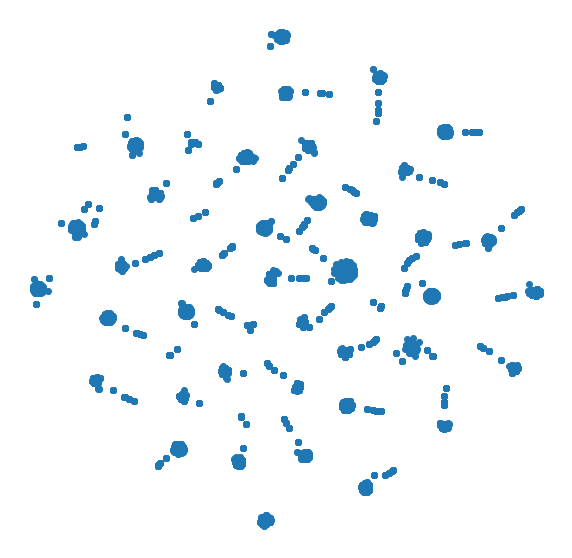

In [120]:
df2['x'] = transformed_features[:,0]
df2['y'] = transformed_features[:,1]
df2['class'] = df['Disease']


plt.scatter(df2['x'], df2['y'])
plt.axis('off')
plt.show()

In [121]:
classes=df2["class"].unique().tolist()
diseases=[classes.index(x) for x in df2["class"]]
diseases[-10:]

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

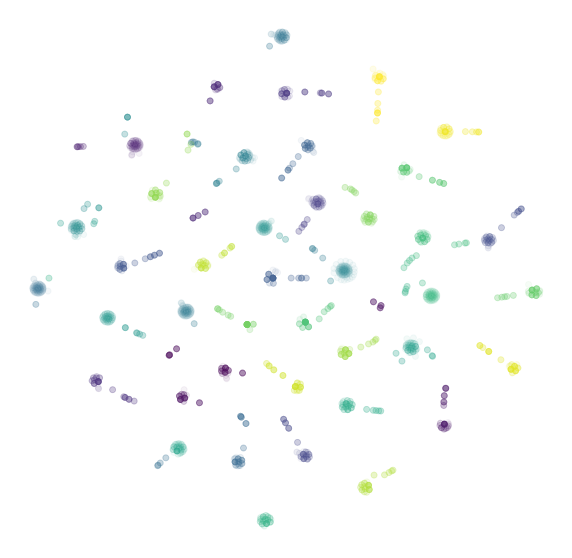

In [129]:
plt.scatter(df2['x'], df2['y'],c= diseases, alpha= .05, label= diseases)
plt.axis('off')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()